In [1]:
!pip install tqdm egttools seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import egttools as egt

In [3]:
nb_strategies = 3

In [4]:
markers = ["P", "o", "v", "h", "s", "X", "D"]
colors = sns.color_palette("icefire", nb_strategies)

# Exercise 1: Replicator Dynamics of Sin City

## Part 1: Analytical/Numerical calculations

### 1.1.1

Write here your solution

### 1.1.2

In [5]:
# define the parameters
p_o = 0.2
p_c = 0.5
e_c = 1
e_o = 2
b_c = 15
b_cf = 2
b_o = 10
b_p = 10
c_cf = 5
c_c = 50
c_o = 3
c_po = 1

In [6]:
strategy_labels = ["O", "C", "P"]

## 1.1.3

Before you start the next part, please assign the payoff matrix you have created in this part to a variable called `payoff_matrix_1`. This will allow you to run the example code we provide.

In [7]:
payoff_matrix_1 = np.ones(3)# assign a payoff matrix to this variable !

## Part 2 Monte Carlo simulations

First let's plot the time evolution of the simulation by integrating the differential equation with odeint in the time interval [0, 10] in 1000 evenly distributed steps over 1000 independent runs.

In [8]:
from scipy.integrate import odeint

In [9]:
nb_runs = 1000
nb_time_steps = 1000
t = np.arange(0, 10, 10/nb_time_steps)

In [10]:
def run_replicator_dynamics(t: np.ndarray, payoff_matrix: np.ndarray, nb_runs: int):
    results = []
    for i in range(nb_runs):
        x0 = egt.sample_unit_simplex(3)
        result = odeint(lambda x, t: egt.analytical.replicator_equation(x, payoff_matrix), x0, t)
        results.append(result)
        
    return results

In [11]:
results = run_replicator_dynamics(t, payoff_matrix_1, nb_runs)

results = np.asarray(results)

The following plot shows that at $t=4$ most of the simulations have already converged. This is important, since it means that all simulations converge before $t=10$ and thus our avarages the following exercise will be correct. The convergence, as expected, depends on the starting point, and on average, the population will end more often with 100% of Poice Officers (O). This means that, as could be seen in the simplex plot you should produce for Part 1, O has the largest basin of attraction in this configuration.

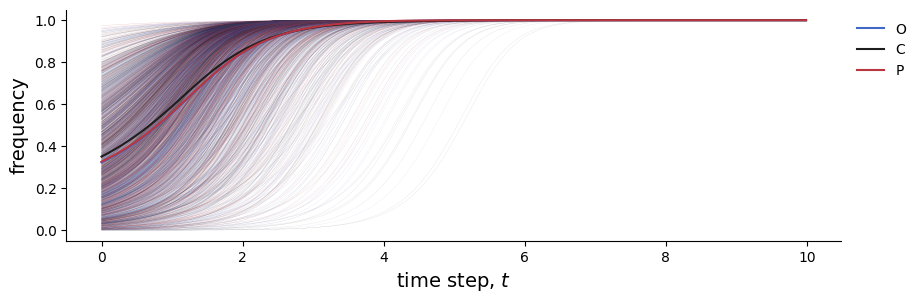

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))

for run in results:
    for i in range(nb_strategies):
        ax.plot(t, run[:, i],
            linewidth=.05, alpha=0.6, color=colors[i])
        
for i in range(nb_strategies):
    ax.plot(t, np.mean(results[:, :, i], axis=0), linewidth=1.5, 
            alpha=1, color=colors[i], label=strategy_labels[i])   

ax.legend(frameon=False, bbox_to_anchor=(1.1,1,0,0), loc='upper right')
ax.set_ylabel("frequency", fontsize=14)
ax.set_xlabel("time step, $t$", fontsize=14)
# ax.set_ylim(-0.2, 1.2)
sns.despine()

### 1.2.1 and 1.2.2

Now let's apply the same methodology to run the Monte-Carlo simulations required to solve these two exercises

In [13]:
p_os = np.linspace(0, 1, 11)
nb_runs = 1000
nb_generations = 1000
t = np.arange(0, 10, 10/nb_generations)

You can use the following code to produce the plot with the results of this exercise (this is optional). Adapt the parameter names to whatever you are using.

NameError: name 'avg_results' is not defined

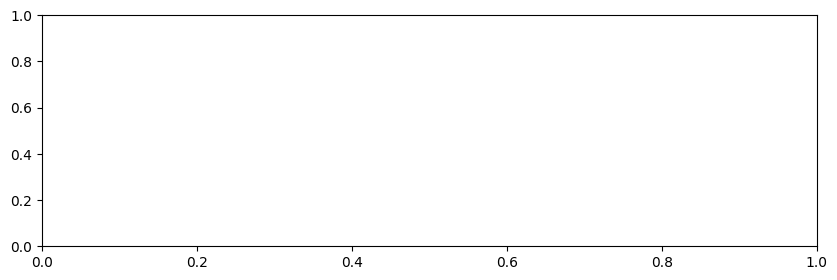

In [14]:
# Code to produce the plot 
fig, ax = plt.subplots(figsize=(10, 3))

for i in range(nb_strategies):
    ax.plot(p_os, avg_results[:, i], marker=markers[i], 
            label=strategy_labels[i], color=colors[i], lw=2)

ax.legend(frameon=False)
ax.set_ylabel("frequency", fontsize=14)
ax.set_xlabel("probability of catching a criminal, $p_o$", fontsize=14)
# ax.set_ylim(-0.2, 1.2)
sns.despine()

### 1.2.3

In [ ]:
p_cs = np.linspace(0, 1, 11)
nb_runs = 1000
nb_generations = 1000
p_o = 0.2

You can use the following code to produce the plot with the results of this exercise (this is optional). Adapt the parameter names to whatever you are using.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

for i in range(nb_strategies):
    ax.plot(p_os, avg_results[:, i], marker=markers[i], 
            label=strategy_labels[i], color=colors[i], lw=2)
    
ax.legend(frameon=False)
ax.set_ylabel("frequency", fontsize=14)
ax.set_xlabel("probability a criminal effectively robs a common citizen, $p_c$", fontsize=14)
# ax.set_ylim(-0.2, 1.2)
sns.despine()

# Exercise 2: Stochastic Dynamics of Sin City

In [ ]:
# reinitialize the changed values
p_o = 0.2
p_c = 0.5

First, as we did in Part 2 of Exercise 1, let's plot the time evolution of the simulation over 1000 time-steps in 1000 independent runs. However, since now we have a stochastic model, we can no longer use ode-int to integrate. Instead, let's use the PairwiseComparisonNumerical class of `egttools` to evolve the population. Since we now want to see what happens in each time step, we will use the method `run`. However, for the next exercises, all you are interested in is the last state the population reaches, so you should use the method `evolve` instead. The call to `evolve` requires the following parameters `evolve(nb_generations, beta, mu, init_state)` where `nb_generations` is the number of generations for which the simulation will be run, `beta` and `mu` are the parameters of the model, and `init_state` is the initial state of the population.

We will first instantiate a game class called `Matrix2PlayerGameHolder` that will allow us to pass our payoff matrix to the `PairwiseComparisonNumerical` class, which will run the simulation.

In [ ]:
from egttools.games import Matrix2PlayerGameHolder
from egttools.numerical import PairwiseComparisonNumerical

Then we define the parameters that are related to the Stochastic model of Social Learning (cache_size is a parameter of the class PairwiseComparisonNumerical that defines how much cache memory will be available, this accelerates computations).

In [ ]:
Z = 100
beta = 1
mu = 1e-3
cache_size = 100000
nb_population_states = egt.calculate_nb_states(Z, nb_strategies)

Then we define how many runs and generations we will compute. We will continue to use in this example the payoff matrix computed in the first exercise.

In [ ]:
nb_runs = 1000
nb_generations = 1000

Now we instationate the game and the evolver. Bear in mind for the next exercise that you will need to instantiate a new game and evolver for every new payoff matrix you calculate.

In [ ]:
game = Matrix2PlayerGameHolder(nb_strategies, payoff_matrix_1)
evolver = PairwiseComparisonNumerical(Z, game, cache_size)

In [ ]:
results = []

for i in range(nb_runs):
    index = np.random.randint(0, nb_population_states)
    x0 = egt.sample_simplex(index, Z, nb_strategies)
    result = evolver.run(nb_generations, 0, beta, mu, x0)
    results.append(result)
results = np.asarray(results)

There are a few differences in the following figure with respect of the model with infinite populations (which uses the replicator equation) which you should notice: 

1. the population now varies in discrete steps of at most 1 individual (since we have a birth-death process)
2. instead of frequency the state of the population is now represented by the counts of each strategy in the finite population (or by its proportion).
3. many simulations have not yet converged by generation 1000.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

for run in results:
    for i in range(nb_strategies):
        ax.plot(range(nb_generations), run[:, i]/Z,
            linewidth=.05, alpha=0.6, color=colors[i])
        
for i in range(nb_strategies):
    ax.plot(range(nb_generations), np.mean(results[:, :, i]/Z, axis=0), linewidth=1.5, 
            alpha=1, color=colors[i], label=strategy_labels[i])   

ax.legend(frameon=False, bbox_to_anchor=(1.1,1,0,0), loc='upper right')
ax.set_ylabel("proportion ($k/Z$)", fontsize=14)
ax.set_xlabel("generation", fontsize=14)
# ax.set_ylim(-0.2, 1.2)
sns.despine()

Point 3 of the previous discussion above the previous plot indicates that we need to run more generations of the simulation to have reliable results. Let's do that:

In [ ]:
nb_runs = 1000
nb_generations = 10000 # now we use 10ˆ4 generations

In [ ]:
results = []

for i in range(nb_runs):
    index = np.random.randint(0, nb_population_states)
    x0 = egt.sample_simplex(index, Z, nb_strategies)
    result = evolver.run(nb_generations, 0, beta, mu, x0)
    results.append(result)
results = np.asarray(results)

The following plot shows that $10^4$ generations should be enough, and this is the number of generations that you need to use for Exercise 2. However, you should notice that there are some ciclic dynamics occuring until very late in the simulations, and there are small variations even at the end. If there was no mutation, we would not observe those variations.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

for run in results:
    for i in range(nb_strategies):
        ax.plot(range(nb_generations), run[:, i]/Z,
            linewidth=.05, alpha=0.6, color=colors[i])
        
for i in range(nb_strategies):
    ax.plot(range(nb_generations), np.mean(results[:, :, i]/Z, axis=0), linewidth=1.5, 
            alpha=1, color=colors[i], label=strategy_labels[i])   

ax.legend(frameon=False, bbox_to_anchor=(1.1,1,0,0), loc='upper right')
ax.set_ylabel("proportion ($k/Z$)", fontsize=14)
ax.set_xlabel("generation", fontsize=14)
# ax.set_ylim(-0.2, 1.2)
sns.despine()

### 2.1.1

In [ ]:
p_os = np.linspace(0, 1, 11)
nb_runs = 1000
nb_generations = 10000

You can use the following code to produce the plot with the results of this exercise (this is optional). Adapt the parameter names to whatever you are using.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

for i in range(nb_strategies):
    ax.plot(p_os, avg_results[:, i], marker=markers[i], 
            label=strategy_labels[i], color=colors[i], lw=2)

ax.legend(frameon=False)
ax.set_ylabel("frequency", fontsize=14)
ax.set_xlabel("probability of catching a criminal, $p_o$", fontsize=14)
# ax.set_ylim(-0.2, 1.2)
sns.despine()

### 2.1.2

In [ ]:
p_cs = np.linspace(0, 1, 11)
nb_runs = 1000
nb_generations = 10000
p_o = 0.2

You can use the following code to produce the plot with the results of this exercise (this is optional). Adapt the parameter names to whatever you are using.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

for i in range(nb_strategies):
    ax.plot(p_os, avg_results[:, i], marker=markers[i], 
            label=strategy_labels[i], color=colors[i], lw=2)
    
ax.legend(frameon=False)
ax.set_ylabel("proportion ($k/Z$)", fontsize=14)
ax.set_xlabel("probability a criminal effectively robs a common citizen, $p_c$", fontsize=14)
# ax.set_ylim(-0.2, 1.2)
sns.despine()